In [ ]:
#공식 document를 찾아보면 numpy.power(x1, x2)를 사용할 때, x1, x2가 array_like인 것을 알 수 있다.
#그리고 x1에는 base, x2에는 exponent가 들어가게 된다.
#(https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.power.html)

import numpy as np
import matplotlib.pyplot as plt

#np.power()를 이용한 연산 중에 가장 간단한 예시를 보자.

x_np = np.array([1, 2, 3, 4, 5])

power2_np = np.power(x_np, 2) # 파라미터의 첫번쨰가 밑이 된다, 두번째가 지수, 지수는 a^{n}로 표현
power3_np = np.power(x_np, 3)

print("power2_np:", power2_np)
print("power3_np:", power3_np)

power2_np: [ 1  4  9 16 25]
power3_np: [  1   8  27  64 125]


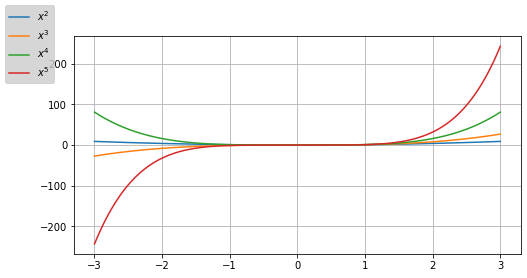

In [ ]:
x_range = np.linspace(-3, 3, 500)

power2_np = np.power(x_range, 2)
power3_np = np.power(x_range, 3)
power4_np = np.power(x_range, 4)
power5_np = np.power(x_range, 5)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(x_range, power2_np, label = '$x^{2}$')
ax.plot(x_range, power3_np, label = '$x^{3}$')
ax.plot(x_range, power4_np, label = '$x^{4}$')
ax.plot(x_range, power5_np, label = '$x^{5}$')
ax.grid()
fig.legend(facecolor = (0.8, 0.8, 0.8), loc = 'upper left')

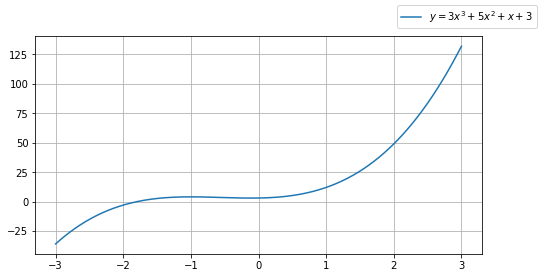

In [ ]:
#위의 Usage를 이용하면 다음과 같은 다항식도 만들어낼 수 있게 된다.
#$y = 3x^{3} + 5x^{2} + x + 3$

x_range = np.linspace(-3, 3, 500)

poly_np = 3*np.power(x_range, 3) + 5*np.power(x_range, 2) + x_range + 3

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(x_range, poly_np, label = r'$y = 3x^{3} + 5x^{2} + x + 3$')
fig.legend()
ax.grid()

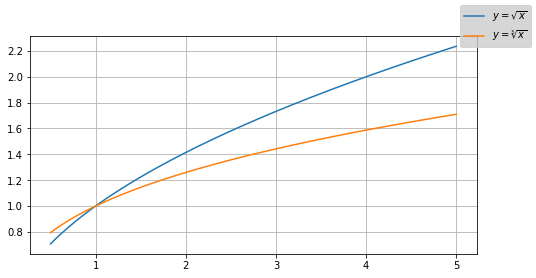

In [ ]:
#위의 Usage.1에서 x2에 1보다 작고 0보다 큰 값을 넣으면 다음과 같은 결과가 나오게 된다.
#$x^{1/2} = \sqrt{x}$
#$x^{1/3} = \sqrt[3]{x}$

x_range = np.linspace(0.5, 5, 500)

sqrt2_np = np.power(x_range, 0.5)
sqrt3_np = np.power(x_range, 1/3)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(x_range, sqrt2_np, label = '$ y = \sqrt{x} $')
ax.plot(x_range, sqrt3_np, label = '$ y = \sqrt[3]{x} $')
ax.grid()
fig.legend(facecolor = (0.8, 0.8, 0.8), loc = 'upper right')

In [ ]:
#이번엔 x1에는 scalar를 넣고 x2에 ndarray를 넣어보자.

exponent_np = np.array([1, 2, 3, 4, 5])

exp_np1 = np.power(2, exponent_np) #밑이 2인 array element의 제곱
exp_np2 = np.power(3, exponent_np)

print("exp_np1:", exp_np1)
print("exp_np2:", exp_np2)

exp_np1: [ 2  4  8 16 32]
exp_np2: [  3   9  27  81 243]


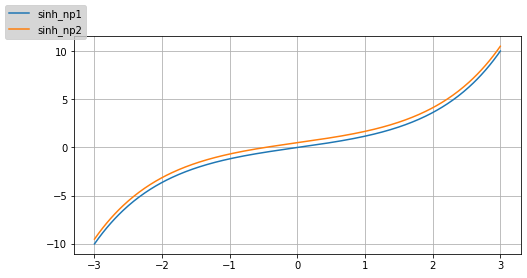

In [ ]:
#np.power()를 잘 이용하면 power function 뿐만 아니라 exponent function 까지도 접목시킬 수 있다.

E = np.e
radian_range = np.linspace(-3, 3, 300)

sinh_np1 = (np.exp(radian_range) - np.exp(-1*radian_range))/2
sinh_np2 = (np.power(E, radian_range) - np.power(E, -1*radian_range))/2 + 0.5 #겹치기 방지용 +0.5

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(radian_range, sinh_np1, label = 'sinh_np1')
ax.plot(radian_range, sinh_np2, label = 'sinh_np2')
ax.grid()
fig.legend(facecolor = (0.8, 0.8, 0.8), loc = 'upper left')

In [ ]:
#NumPy가 다량의 data를 한 번에 다루는 특징과 위의 배운 내용들을 조합하면 다음과 같이 사용할 수도 있다.
#만약 우리가 0부터 9까지의 수들을 차례대로 2, 3, 4, 5, 6제곱을 하고싶다고 가정하자.
#그러면 먼저 다음과 같이 x값들을 만들어내고 exponent들의 ndarray를 만들어낼 수 있다.

x_range = np.tile(np.arange(10), (5,1)) #다중배열 생성
exp_np = np.arange(2,7).reshape(-1,1) # n1요소 부터 n2-1요소까지, 행은 미정, 열은 1
print(x_range,'\n')
print(exp_np,'\n')

#위에서 주목할 점은 바로 shape이다. 각각의 shape은 다음과 같다.
print(x_range.shape, exp_np.shape,'\n')

#NumPy에게 broadcasting을 시키면
exp_mat = np.power(x_range, exp_np)
print("exp_mat:\n", exp_mat)
#위와 같이 각각 2,3,4,5,6 제곱들을 한 번에 연산할 수 있기 때문에 "불필요한 for loop"을 제거할 수 있게 된다.
#불필요한 for loop을 제거하는 것이 곧 컴퓨터 성능을 좌우하기 때문에 vectorization의 관점에서도 위의 예시는 핵심적인 기능을 한다

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]] 

[[2]
 [3]
 [4]
 [5]
 [6]] 

(5, 10) (5, 1) 

exp_mat:
 [[     0      1      4      9     16     25     36     49     64     81]
 [     0      1      8     27     64    125    216    343    512    729]
 [     0      1     16     81    256    625   1296   2401   4096   6561]
 [     0      1     32    243   1024   3125   7776  16807  32768  59049]
 [     0      1     64    729   4096  15625  46656 117649 262144 531441]]


In [ ]:
#분석을 하면 빠질 수 없는 것이 Complex number들이다. 그리고 NumPy에서는 image number를 j로 표시한다
#이 Complex number를 더 편리하게 사용하기 위해 다음과 같은 method들을 배워보도록 하자.

#1. np.real()
#2. np.imag()
#3. np.angle()
#4. np.conj()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#NumPy에서 imaginary number는 j로 표시한다고 했으므로 다음과 같이 ndarray를 만들어낼 수 있다.

test_np = np.array([1+1j, 1-1j, 3+2j, 5-2j])
print(test_np)

#j라고만 쓰면 NumPy는 j를 variable로 인식하기 때문에 1j로 써줘야 한다.
#그리고 j도 하나의 scalar이기 때문에 다음과 같이 ndarray를 만드는 것도 가능하다.
real_np = np.arange(10)
imag_np = np.arange(10)[::-1]*1j
cpx_np = real_np + imag_np

print("real_np:", real_np)
print("imag_np:", imag_np)
print("cpx_np:", cpx_np)

[1.+1.j 1.-1.j 3.+2.j 5.-2.j]
real_np: [0 1 2 3 4 5 6 7 8 9]
imag_np: [0.+9.j 0.+8.j 0.+7.j 0.+6.j 0.+5.j 0.+4.j 0.+3.j 0.+2.j 0.+1.j 0.+0.j]
cpx_np: [0.+9.j 1.+8.j 2.+7.j 3.+6.j 4.+5.j 5.+4.j 6.+3.j 7.+2.j 8.+1.j 9.+0.j]


In [36]:
#이름에서 알 수 있듯이 np.real(), np.imag()는 각 complex number의 real part, imaginary part를 뽑아주는 역할을 한다.

print("cpx_np:", cpx_np)
print("np.real(cpx_np):", np.real(cpx_np))
print("np.imag(cpx_np):", np.imag(cpx_np),'\n')

#또한 np의 method 말고 ndarray의 method들로도 다음과 같이 이용할 수 있다.

print("cpx_np:", cpx_np)
print("cpx_np.real:", cpx_np.real)
print("cpx_np.imag:", cpx_np.imag)

cpx_np: [0.+9.j 1.+8.j 2.+7.j 3.+6.j 4.+5.j 5.+4.j 6.+3.j 7.+2.j 8.+1.j 9.+0.j]
np.real(cpx_np): [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
np.imag(cpx_np): [9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 

cpx_np: [0.+9.j 1.+8.j 2.+7.j 3.+6.j 4.+5.j 5.+4.j 6.+3.j 7.+2.j 8.+1.j 9.+0.j]
cpx_np.real: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
cpx_np.imag: [9. 8. 7. 6. 5. 4. 3. 2. 1. 0.]


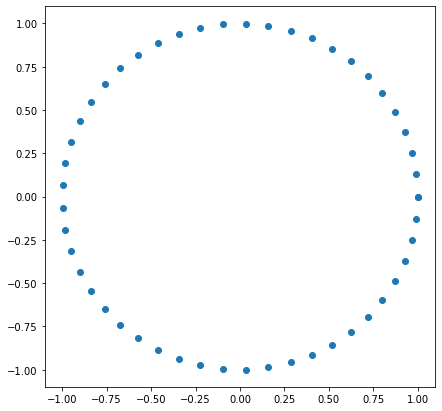

In [39]:
#np.angle()을 사용하기 위해 다음과 같이 complex unit circle을 만들어보자.
#다음은 Euler's Formula를 이용한다.

radian_range = np.linspace(0, 2*np.pi)
cpx_circle = np.cos(radian_range) + np.sin(radian_range)*1j
#그리고 real, imag를 뽑아내서 결과를 확인해보자.

real_part = cpx_circle.real
imag_part = cpx_circle.imag

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(real_part, imag_part)


In [40]:
print(cpx_circle)

[ 1.        +0.00000000e+00j  0.99179001+1.27877162e-01j
  0.96729486+2.53654584e-01j  0.92691676+3.75267005e-01j
  0.8713187 +4.90717552e-01j  0.80141362+5.98110530e-01j
  0.71834935+6.95682551e-01j  0.6234898 +7.81831482e-01j
  0.51839257+8.55142763e-01j  0.40478334+9.14412623e-01j
  0.28452759+9.58667853e-01j  0.1595999 +9.87181783e-01j
  0.03205158+9.99486216e-01j -0.09602303+9.95379113e-01j
 -0.22252093+9.74927912e-01j -0.34536505+9.38468422e-01j
 -0.46253829+8.86599306e-01j -0.57211666+8.20172255e-01j
 -0.67230089+7.40277997e-01j -0.76144596+6.48228395e-01j
 -0.8380881 +5.45534901e-01j -0.90096887+4.33883739e-01j
 -0.94905575+3.15108218e-01j -0.98155916+1.91158629e-01j
 -0.99794539+6.40702200e-02j -0.99794539-6.40702200e-02j
 -0.98155916-1.91158629e-01j -0.94905575-3.15108218e-01j
 -0.90096887-4.33883739e-01j -0.8380881 -5.45534901e-01j
 -0.76144596-6.48228395e-01j -0.67230089-7.40277997e-01j
 -0.57211666-8.20172255e-01j -0.46253829-8.86599306e-01j
 -0.34536505-9.38468422e-01j -0

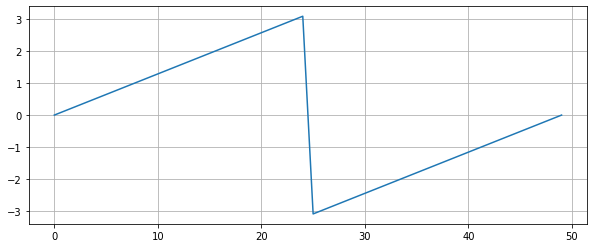

In [46]:
#이제 위의 complex number들에 대해 np.angle()을 적용해보면 다음과 같다.

angle_np = np.angle(cpx_circle)

plt.figure(figsize = (10,4))
plt.grid()
plt.plot(angle_np)
#즉, 0부터 PI까지 제대로 나오는 것을 확인할 수 있다. 
#그리고, angle은 -PI부터 PI까지만 다루므로 PI를 넘어가면 -2PI의 offset 걸어 radian boundary안에 들어가도록 수정해주는 모습 또한 볼 수 있다

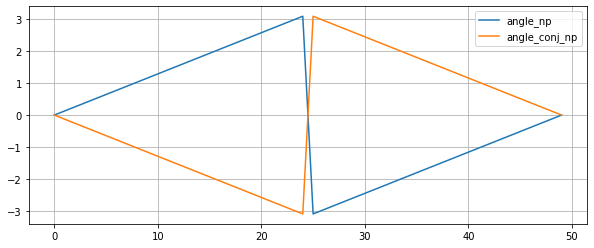

In [49]:
#complex conjugate은 angle의 부호를 바꿔주는 역할을 한다. 그러면 위의 결과에서 npconj()을 사용하여 부호를 바꿔주는지 확인해보자.

angle_np = np.angle(cpx_circle)
angle_conj_np = np.angle(np.conj(cpx_circle)) #부호바뀐 angle

plt.figure(figsize = (10,4))
plt.grid()
plt.plot(angle_np, label = 'angle_np')
plt.plot(angle_conj_np, label = 'angle_conj_np')
plt.legend()
# 절대값은 바뀌지 않고, angle의 부호만 바뀌는 것을 확인할 수 있다